# **📊World Happiness Data**

#### **Overview**
In this notebook, we will:

Explore the data to understand its structure.
Handle missing values effectively.
Preprocess the data for modeling.
Build and evaluate a neural network

In [121]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [122]:
data=pd.read_csv('/kaggle/input/world-happiness-data-2024-explore-life/World Happiness Report 2024.csv')

# Exploratry Data Analysis

In [123]:
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [124]:
data.isnull().sum().sort_values(ascending=True)

Country name                          0
year                                  0
Life Ladder                           0
Social support                       13
Negative affect                      16
Positive affect                      24
Log GDP per capita                   28
Freedom to make life choices         36
Healthy life expectancy at birth     63
Generosity                           81
Perceptions of corruption           125
dtype: int64

In [125]:
data.shape

(2363, 11)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


# Data Visualization

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

__Visualization Type: Histogram with KDE.__                 
__Description: Visualizes the distribution of life satisfaction scores.__

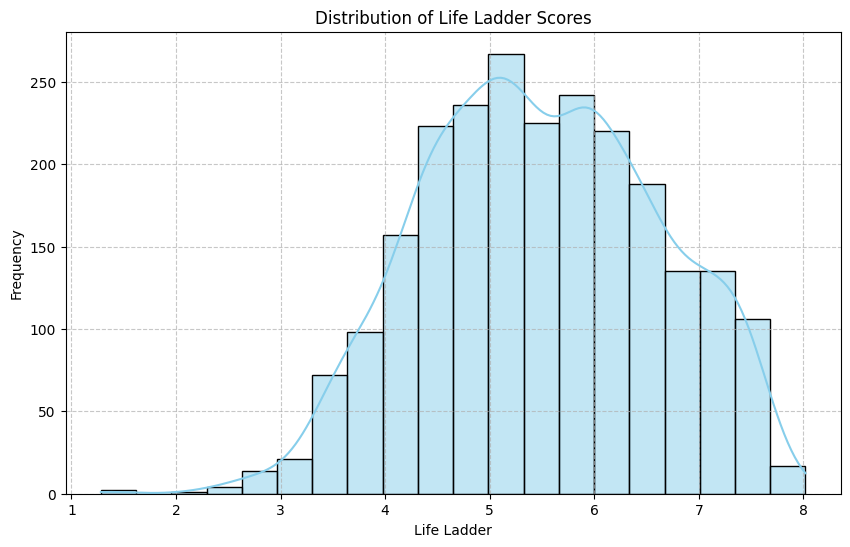

In [128]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Life Ladder'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Life Ladder Scores')
plt.xlabel('Life Ladder')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


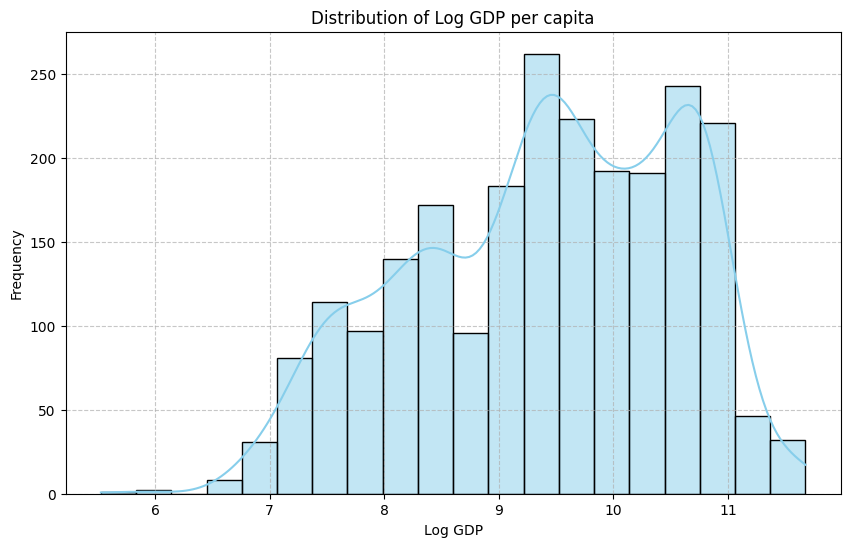

In [129]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Log GDP per capita'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Log GDP per capita')
plt.xlabel('Log GDP')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

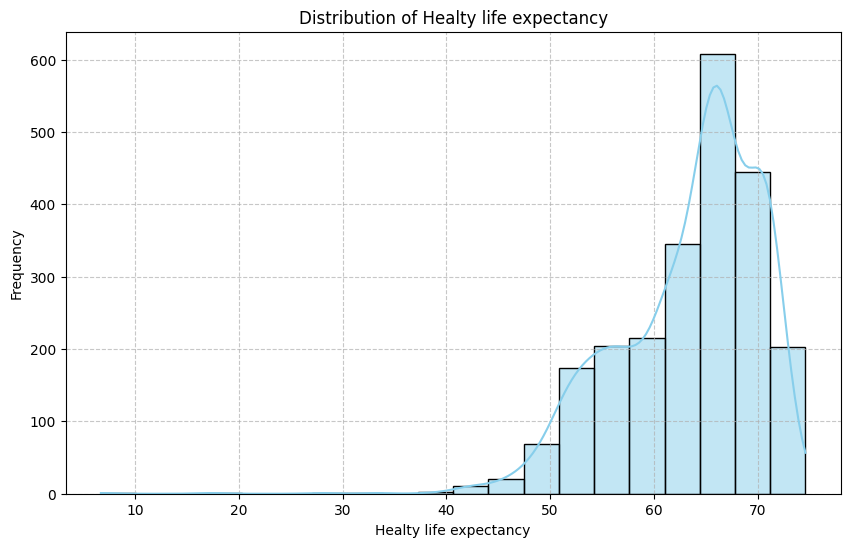

In [130]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Healthy life expectancy at birth'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Healty life expectancy')
plt.xlabel('Healty life expectancy')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Visualization Type: Heatmap**                          
**Description: Shows correlations between all numerical features in the dataset.**

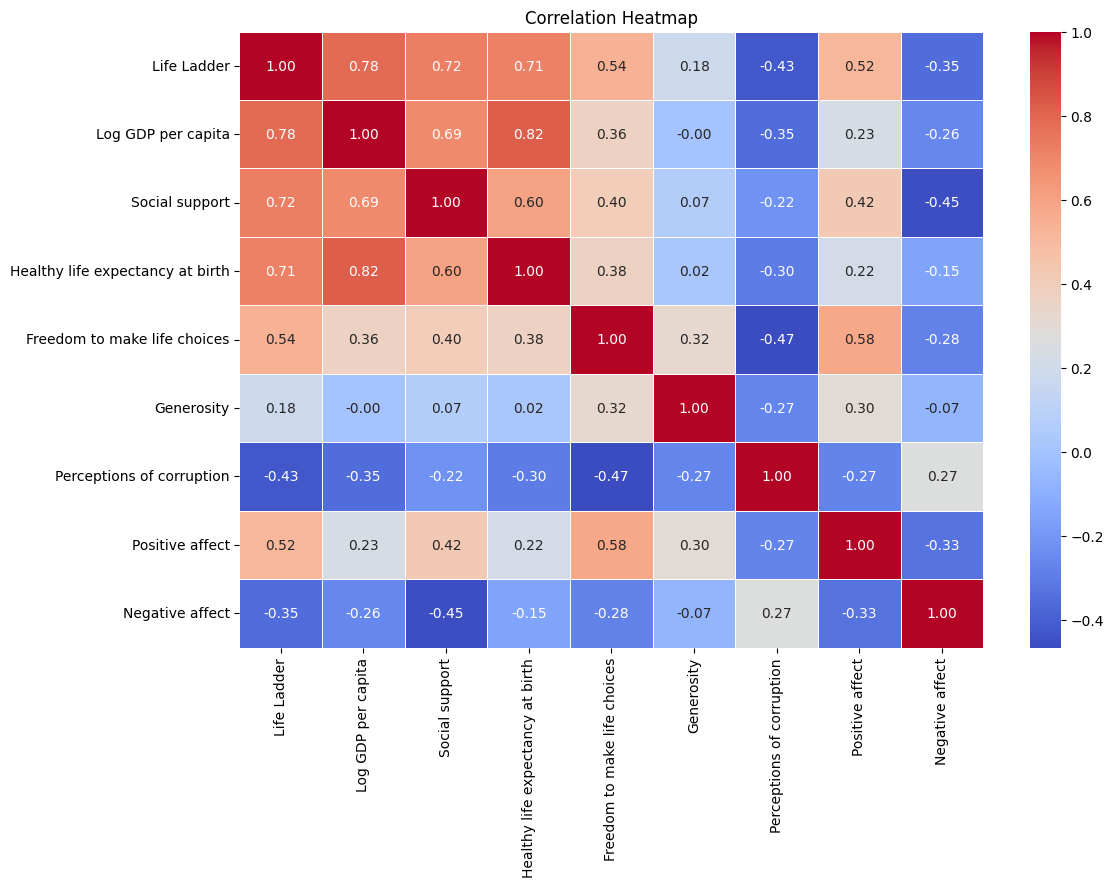

In [131]:

plt.figure(figsize=(12, 8))
correlation_matrix = data[['Life Ladder', 'Log GDP per capita', 'Social support', 
                         'Healthy life expectancy at birth', 'Freedom to make life choices', 
                         'Generosity', 'Perceptions of corruption', 'Positive affect', 
                         'Negative affect']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Visualization Type: Scatter Plot**                   
**Description: Shows the relationship between GDP per capita and life satisfaction.**

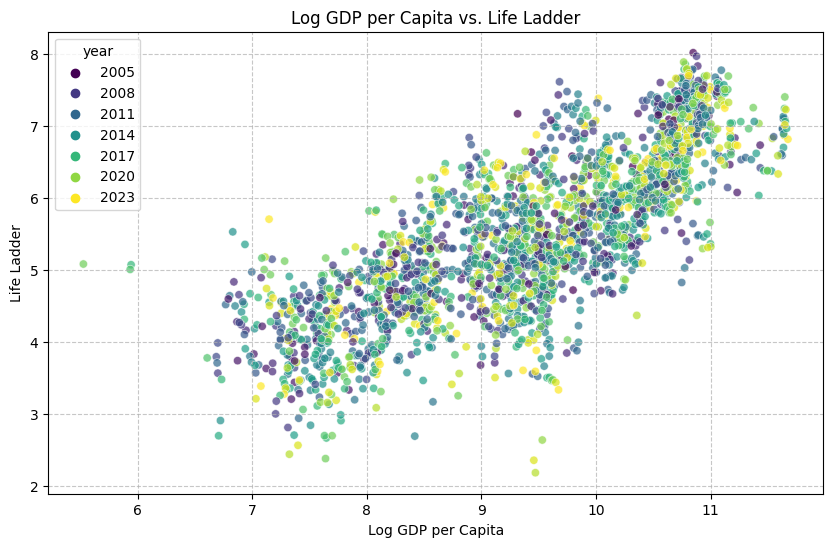

In [132]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Log GDP per capita', y='Life Ladder', hue='year', palette='viridis', alpha=0.7)
plt.title('Log GDP per Capita vs. Life Ladder')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Life Ladder')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Data Preprocessing

In [133]:
from sklearn.preprocessing import QuantileTransformer, LabelEncoder
from scipy import stats

#### **Handle Missing Values**

In [134]:
data= data.drop(columns=['Country name','year']) 
data = data.dropna()

In [135]:
data.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [136]:
transformer = QuantileTransformer(output_distribution = 'normal')
transformed_data = transformer.fit_transform(data)

In [137]:
transformed_data = pd.DataFrame(transformed_data, columns=data.columns)

In [138]:
transformed_data.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,-1.541012,-1.644799,-2.319180,-1.694923,-0.331980,1.046894,0.801511,-2.120775,-0.063593
1,-0.881852,-1.465253,-1.719628,-1.649552,-0.559726,1.125758,0.451062,-1.562262,-0.326734
2,-0.539467,-1.327991,-1.785512,-1.607417,-1.032358,0.798643,-0.590556,-1.196189,0.150037
3,-1.424073,-1.382050,-1.894690,-1.537691,-1.587168,1.033533,-0.467119,-1.579718,0.039681
4,-1.484141,-1.255549,-1.896803,-1.484995,-1.401154,1.329556,-0.180988,-0.370805,0.050071


#### **Features Engineering**

In [139]:
# binning 
binned_data = pd.DataFrame()
for col in transformed_data.columns:
    binned_data[col], bin_edges = pd.cut(transformed_data[col], bins=5, labels=False, retbins=True)
    print(f'Column: {col}')
    print(f'Bin edges: {bin_edges}')
    print('-' * 30)

Column: Life Ladder
Bin edges: [-5.20973626 -3.11960255 -1.03986752  1.03986752  3.11960255  5.19933758]
------------------------------
Column: Log GDP per capita
Bin edges: [-5.20973626 -3.11960255 -1.03986752  1.03986752  3.11960255  5.19933758]
------------------------------
Column: Social support
Bin edges: [-5.20973626 -3.11960255 -1.03986752  1.03986752  3.11960255  5.19933758]
------------------------------
Column: Healthy life expectancy at birth
Bin edges: [-5.20973626 -3.11960255 -1.03986752  1.03986752  3.11960255  5.19933758]
------------------------------
Column: Freedom to make life choices
Bin edges: [-5.20973626 -3.11960255 -1.03986752  1.03986752  3.11960255  5.19933758]
------------------------------
Column: Generosity
Bin edges: [-5.20973626 -3.11960255 -1.03986752  1.03986752  3.11960255  5.19933758]
------------------------------
Column: Perceptions of corruption
Bin edges: [-5.20973626 -3.11960255 -1.03986752  1.03986752  3.11960255  5.19933758]
------------------

In [140]:
binned_data.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,1,1,1,1,2,3,2,1,2
1,2,1,1,1,2,3,2,1,2
2,2,1,1,1,2,2,2,1,2
3,1,1,1,1,1,2,2,1,2
4,1,1,1,1,1,3,2,2,2


# **Model Building**

In [141]:
!pip install pytorch_tabnet

  Using cached pytorch_tabnet-4.1.0-py3-none-any.whl.metadata (15 kB)
Using cached pytorch_tabnet-4.1.0-py3-none-any.whl (44 kB)


In [142]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [143]:
 #Separate features and target

# Train-valid-test split (0.7, 0.2, 0.1)
X = binned_data.drop(columns = ['Life Ladder'])
y = binned_data['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [ ]:
"""
# save the data
X_train.to_csv('X_train.csv', index=False)
X_valid.to_csv('X_valid.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_valid.to_csv('y_valid.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
"""

In [144]:
# pd to numpy for tabnet
X_train_np = X_train.values
X_valid_np = X_valid.values
X_test_np = X_test.values
y_train_np = y_train.values
y_valid_np = y_valid.values

#### **TabNet**

In [145]:
# network parameters
tabnet_params = {"optimizer_fn":torch.optim.Adam,
                 "optimizer_params":dict(lr=2e-2),
                 "scheduler_params":{"step_size":50, 
                                 "gamma":0.9},
                 "scheduler_fn":torch.optim.lr_scheduler.StepLR,
                 "mask_type":'entmax', # "sparsemax"
                 "gamma" : 1.3 # coefficient for feature reusage in the masks
                }

In [146]:
# Define the model
clf = TabNetClassifier(**tabnet_params)
clf.fit(
    X_train_np, y_train_np,
    eval_set=[(X_valid_np, y_valid_np)],
    max_epochs = 100, patience = 100
)

epoch 0  | loss: 1.16955 | val_0_accuracy: 0.5     |  0:00:00s
epoch 1  | loss: 0.97182 | val_0_accuracy: 0.29147 |  0:00:00s
epoch 2  | loss: 0.77911 | val_0_accuracy: 0.22749 |  0:00:00s
epoch 3  | loss: 0.63668 | val_0_accuracy: 0.15877 |  0:00:01s
epoch 4  | loss: 0.60564 | val_0_accuracy: 0.16588 |  0:00:01s
epoch 5  | loss: 0.58996 | val_0_accuracy: 0.16825 |  0:00:01s
epoch 6  | loss: 0.56607 | val_0_accuracy: 0.16114 |  0:00:01s
epoch 7  | loss: 0.56117 | val_0_accuracy: 0.15877 |  0:00:01s
epoch 8  | loss: 0.52494 | val_0_accuracy: 0.16114 |  0:00:01s
epoch 9  | loss: 0.5216  | val_0_accuracy: 0.15166 |  0:00:01s
epoch 10 | loss: 0.51198 | val_0_accuracy: 0.14692 |  0:00:01s
epoch 11 | loss: 0.51855 | val_0_accuracy: 0.13507 |  0:00:01s
epoch 12 | loss: 0.49341 | val_0_accuracy: 0.14455 |  0:00:01s
epoch 13 | loss: 0.49462 | val_0_accuracy: 0.15403 |  0:00:01s
epoch 14 | loss: 0.46669 | val_0_accuracy: 0.1564  |  0:00:01s
epoch 15 | loss: 0.47249 | val_0_accuracy: 0.16114 |  0

#### **Evaluation**

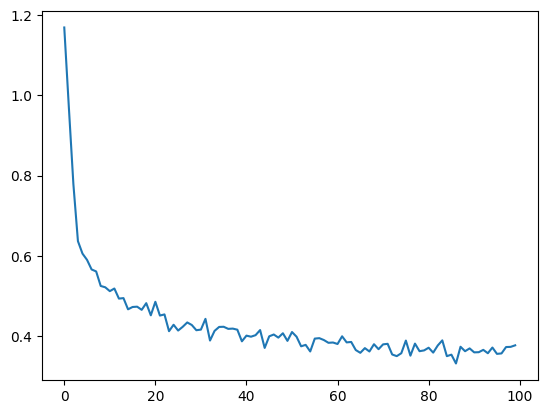

In [147]:
# Evaluation
plt.plot(clf.history['loss'])

In [148]:
preds = clf.predict_proba(X_test_np)

In [149]:
preds_mapper = { idx : class_name for idx, class_name in enumerate(clf.classes_)}

In [150]:
y_pred = np.vectorize(preds_mapper.get)(np.argmax(preds, axis=1))
test_acc = accuracy_score(y_pred=y_pred, y_true=y_test)

In [151]:
print(f"BEST VALID SCORE  : {clf.best_cost}")
print(f"FINAL TEST SCORE  : {test_acc}")

BEST VALID SCORE  : 0.7417061611374408
FINAL TEST SCORE  : 0.7307692307692307


<Axes: >

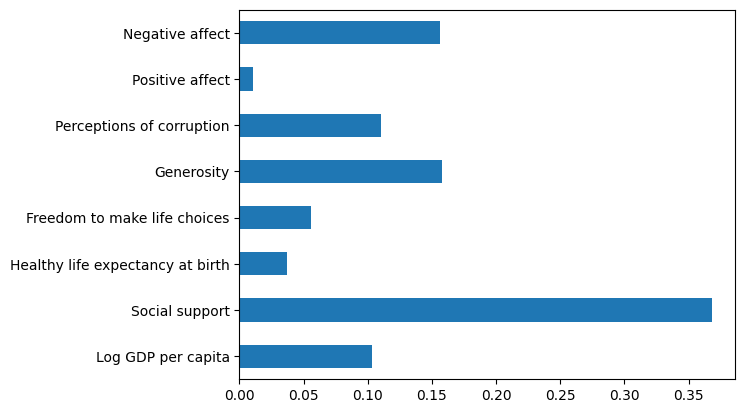

In [152]:
# global
features = [ col for col in X_train.columns ]
feat_importances = pd.Series(clf.feature_importances_, index=features)
feat_importances.plot(kind='barh')

## Baseline Model for World Happiness Data 2024
- **Dataset**: [World Happiness Data 2024 from Kaggle](https://www.kaggle.com/datasets/abdullah0a/world-happiness-data-2024-explore-life/data)
- **Implementation Environment**: Google Colab, Python 3.9

- **Google Colab Notebook**: [Link to Baseline Model](https://colab.research.google.com/drive/1ABC...xyz)
- **Dataset**: The dataset is loaded from the Kaggle link directly in the notebook.
- **Contact Information for Q&A**: rhwnstjd2004@korea.ac.kr